In [1]:
pip install japanize-matplotlib #日本語対応のグラフ描写ライブラリをインストールをする

     |████████████████████████████████| 4.1MB 4.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=7c7cb34b1cc282894be95d33ce1153dfd9f43f822ab4f39e6080814efb9f9e27
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib #日本語化matplotlib
import seaborn as sns
sns.set(font="IPAexGothic") #日本語フォント設定

import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [3]:
from google.colab import drive
drive.mount('/content/drive')#作業フォルダの設定

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df = pd.read_excel("/content/drive/My Drive/Samson/data_2.xlsx")#ファイルオープン
df.head(10)#先頭10行を表示

,Month Year,GroupA,GroupB,問い合わせ,Nikkei225,Nikkei300,Nikkei500,Nikkei1000,Nikkei-JASDAQ,JASDAQ,JPX-Nikkei400,TOPIX,TOPIX100,TOPIX500,TOPIX1000,食品,繊維,パルプ・紙,ガス,ゴム,サービス,医薬品,化学,機械,建設,商社,小売業,水産,倉庫,不動産,保険,海運,石油,空運,窯業,精密機器,自動車,証券,輸送用機器,通信,造船,鉄道・バス,鉄鋼,鉱業,銀行,陸運,電力,電気機器,非鉄金属
0,１１月2019,12,4,619,23293.91,345.05,2230.57,2020.26,3664.82,167.74,15183.29,1699.36,1090.10,1311.93,1602.20,1560.55,492.34,266.35,1187.83,2337.64,2222.73,8350.46,1843.44,2011.20,1203.21,2829.35,5361.39,225.35,1428.39,1662.85,3424.84,130.33,868.27,94.82,860.02,7306.93,3222.52,2126.22,658.68,5188.42,112.01,2185.72,165.54,239.86,1031.84,885.81,196.12,7028.25,441.96
1,１０月2019,6,6,591,22927.04,338.47,2183.81,1981.55,3510.68,159.67,14913.13,1667.01,1071.20,1287.90,1571.76,1553.09,487.48,253.70,1209.68,2417.83,2174.99,7975.78,1880.03,1961.43,1238.46,2913.21,5279.79,219.84,1422.01,1634.61,3302.95,130.45,916.79,92.43,840.59,7035.82,3247.75,1968.35,668.82,4961.02,122.94,2119.02,162.69,235.17,1006.00,856.70,202.06,6757.54,434.38
2,９月2019,16,20,509,21755.84,323.15,2081.67,1886.79,3379.39,153.82,14201.08,1587.80,1023.33,1228.67,1498.05,1503.16,480.43,241.67,1199.93,2200.09,2154.77,7301.59,1774.59,1867.74,1173.95,2774.66,5045.47,221.23,1405.86,1559.68,3259.62,114.97,876.82,87.66,782.26,6481.65,2923.91,1956.73,603.33,4868.07,114.98,2074.72,151.48,228.98,965.43,832.82,193.12,6375.77,399.08
3,８月2019,6,18,475,20704.37,307.96,1983.29,1796.43,3294.46,146.13,13493.48,1511.86,978.47,1169.61,1426.23,1456.11,440.12,237.38,1171.82,2106.82,2086.62,7206.83,1708.32,1686.42,1116.59,2656.85,4801.82,215.13,1381.00,1469.43,3095.56,102.36,802.90,90.32,723.83,6061.73,2698.64,1847.94,567.91,5165.28,95.39,1970.05,143.54,215.15,877.30,870.24,192.67,5927.89,365.55
4,７月2019,9,5,631,21521.53,318.16,2026.38,1860.56,3484.19,151.44,13921.46,1565.14,1010.89,1209.08,1475.52,1447.76,455.32,257.95,1194.42,2134.51,2071.66,7388.73,1773.58,1737.20,1138.04,2703.67,4807.18,221.32,1450.06,1484.44,3389.35,117.27,882.03,93.02,806.42,6186.68,2830.22,1894.19,579.42,5445.98,113.00,1940.77,155.06,218.17,941.93,928.08,197.67,6155.34,404.83
5,６月2019,7,8,551,21275.92,315.00,199.31,184265.00,3405.61,147.60,13823.66,1551.14,999.42,1200.28,1463.08,1458.57,475.76,273.23,1127.03,2187.01,1994.32,7100.56,1760.89,1764.17,1126.60,2769.29,4743.12,216.15,1463.88,1485.06,3310.37,111.61,938.48,93.13,810.49,5964.77,2892.79,2009.56,600.55,5220.97,118.53,1966.45,163.87,223.59,951.29,941.57,194.73,6086.88,396.60
6,５月2019,2,10,543,20601.19,306.98,1936.08,1795.29,3339.45,145.16,13461.64,1512.28,971.87,1169.20,1425.72,1453.82,450.22,260.46,1190.92,2083.84,1982.24,6996.68,1696.94,1635.67,1123.39,2738.17,4558.57,214.37,1454.53,1430.75,3320.57,102.94,888.32,92.51,767.70,5598.40,2721.29,1982.34,617.71,5069.33,112.82,2007.64,155.66,202.67,977.44,904.89,193.79,5766.28,381.84
7,４月2019,1,1,571,22258.73,326.76,2084.02,1923.47,3453.10,153.84,14390.83,1617.93,1031.37,1251.21,1526.19,1545.48,467.00,298.71,1272.63,2272.98,1999.32,7429.55,1899.64,1907.49,1209.09,2974.10,4813.79,234.78,1495.96,1507.11,3436.76,125.57,1001.54,101.19,877.36,6077.36,3199.61,2087.69,609.55,5146.68,134.55,2037.79,169.83,232.07,1048.95,924.99,207.70,6473.18,421.78
8,３月 2019,8,16,538,21205.81,321.16,2029.79,1888.38,3444.19,153.05,14176.82,1591.64,1010.49,1231.02,1501.06,1580.71,454.99,314.58,1364.83,2206.18,1919.84,7612.72,1832.60,1747.97,1245.01,2962.84,4773.38,243.73,1497.88,1579.90,3413.41,103.08,1000.86,105.41,872.50,5689.26,3059.55,2164.35,666.71,4952.80,133.91,2106.50,171.99,227.38,1050.20,993.18,229.32,6118.29,426.66
9,２月 2019,7,11,591,21385.16,323.73,2006.59,1907.03,3468.33,151.98,14270.65,1607.66,1023.75,1242.18,1516.14,1545.30,475.44,298.65,1399.46,2333.54,1878.19,7833.45,1785.47,1698.58,1256.66,2903.69,4767.05,237.91,1451.34,1532.71,3506.25,117.84,1064.05,109.95,905.82,5536.29,3259.67,2436.64,630.51,4938.73,148.84,2056.22,173.03,233.23,1107.02,1016.85,237.30,5943.10,427.49


In [5]:
df.count()

Month Year       140
GroupA           140
GroupB           140
問い合わせ            140
Nikkei225        140
Nikkei300        140
Nikkei500        140
Nikkei1000       140
Nikkei-JASDAQ    140
JASDAQ           140
JPX-Nikkei400    140
TOPIX            140
TOPIX100         140
TOPIX500         140
TOPIX1000        140
食品               140
繊維               140
パルプ・紙            140
ガス               140
ゴム               140
サービス             140
医薬品              140
化学               140
機械               140
建設               140
商社               140
小売業              140
水産               140
倉庫               140
不動産              140
保険               140
海運               140
石油               140
空運               140
窯業               140
精密機器             140
自動車              140
証券               140
輸送用機器            140
通信               140
造船               140
鉄道・バス            140
鉄鋼               140
鉱業               140
銀行               140
陸運               140
電力               140
電気機器         

In [0]:
df = df.fillna(0)#「NA」は0で埋めます

In [0]:
groupAmax = max(df["GroupA"])#ｸﾞﾙｰﾌﾟAのマックスをセット
groupBmax = max(df["GroupB"])#ｸﾞﾙｰﾌﾟBのマックスをセット

In [8]:
labels = df.columns#カラムのラベルを取得
print(len(labels))#カラム数を表示
labels#カラムのラベル一覧を表示

49


Index(['Month Year', 'GroupA', 'GroupB', '問い合わせ', 'Nikkei225', 'Nikkei300',
       'Nikkei500', 'Nikkei1000', 'Nikkei-JASDAQ', 'JASDAQ', 'JPX-Nikkei400',
       'TOPIX', 'TOPIX100', 'TOPIX500', 'TOPIX1000', '食品', '繊維', 'パルプ・紙', 'ガス',
       'ゴム', 'サービス', '医薬品', '化学', '機械', '建設', '商社', '小売業', '水産', '倉庫', '不動産',
       '保険', '海運', '石油', '空運', '窯業', '精密機器', '自動車', '証券', '輸送用機器', '通信', '造船',
       '鉄道・バス', '鉄鋼', '鉱業', '銀行', '陸運', '電力', '電気機器', '非鉄金属'],
      dtype='object')

In [9]:
LastMonthYear = datetime(year=2019, month=11, day=1)#日付設定する
print(LastMonthYear)#日付設定したものを表示する

YearMonthList = []#リスト（空）を作ります
for i in range(len(df["Month Year"])):
    #「Month Year」の数だけ、繰り返します
    YearMonthList.append(LastMonthYear)#リストに「LastMonthYear」の日付設定値を追加します
    LastMonthYear = LastMonthYear - relativedelta(months=1)#「LastMonthYear」の日付設定値から1ヶ月減算する

df["Month Year"]=np.array(YearMonthList)#「Month Year」を入替えます

df["Month Year"]#入替え後のデータフレームを表示

2019-11-01 00:00:00


0     2019-11-01
1     2019-10-01
2     2019-09-01
3     2019-08-01
4     2019-07-01
         ...    
135   2008-08-01
136   2008-07-01
137   2008-06-01
138   2008-05-01
139   2008-04-01
Name: Month Year, Length: 140, dtype: datetime64[ns]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


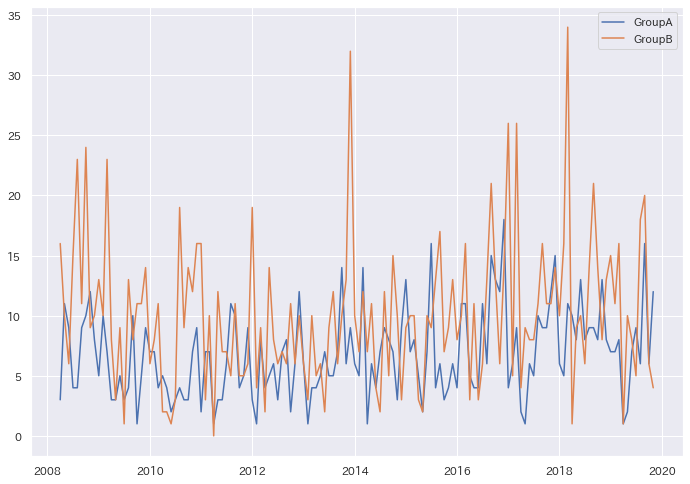

In [10]:
plt.figure(figsize=(11.69,8.27))#図サイズ設定（何でこのサイズ？）

plt.plot(df["Month Year"], df["GroupA"], label="GroupA")#表１
plt.plot(df["Month Year"], df["GroupB"], label="GroupB")#表２

plt.legend()#グラフ表示

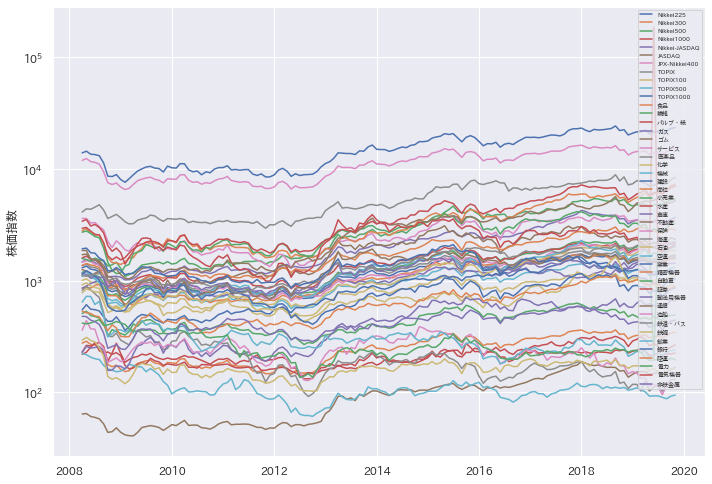

In [11]:
plt.figure(figsize=(11.69,8.27))#図サイズ設定（なんｄ

for i in range(4, len(labels)):
    # 日経225～のカラムのデータフレームを表示
    # X軸は「Month Year」である
    plt.plot(df["Month Year"], df[labels[i]], label=labels[i])

plt.ylabel("株価指数")#Y軸のラベル
plt.legend(fontsize=6)#フォントサイズは６
plt.yscale("log")#見難いから対数グラフにした？様で。
plt.grid(True)#グリッド線

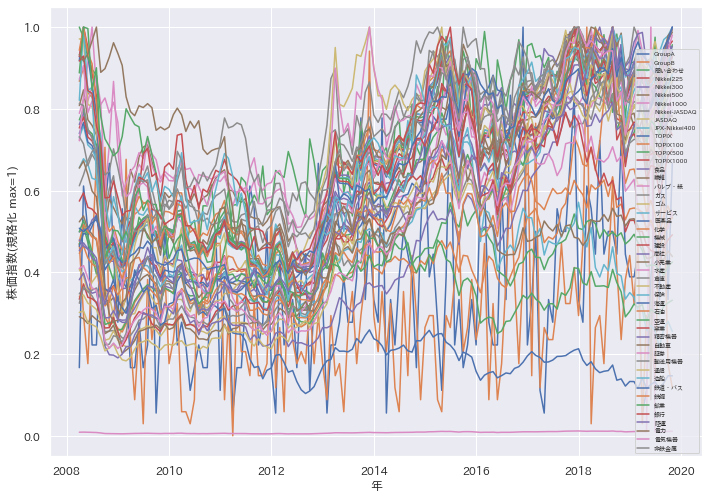

In [12]:
df_normalized = pd.DataFrame()#データフレームの型

plt.figure(figsize=(11.69,8.27))#図サイズ設定

for i in range(len(labels)-1):
    #カラム数だけ繰り返します
    maxval = max(df[labels[i+1]])#MAX値!
    minval = min(df[labels[i+1]])#何でmin?使っていない。
    df_normalized[labels[i+1]]= df[labels[i+1]]/maxval#現在の値を0～1に直します
    plt.plot(YearMonthList, df_normalized[labels[i+1]], label=labels[i+1])#その値をプロット

plt.ylabel("株価指数(規格化 max=1)")#縦軸は０～１にした各値
plt.xlabel("年")#横軸は年月

plt.legend(fontsize=6)#フォントサイズ
plt.grid(True)#グリッド線有効

In [13]:
df_normalized#正規化したものを表示します

,GroupA,GroupB,問い合わせ,Nikkei225,Nikkei300,Nikkei500,Nikkei1000,Nikkei-JASDAQ,JASDAQ,JPX-Nikkei400,TOPIX,TOPIX100,TOPIX500,TOPIX1000,食品,繊維,パルプ・紙,ガス,ゴム,サービス,医薬品,化学,機械,建設,商社,小売業,水産,倉庫,不動産,保険,海運,石油,空運,窯業,精密機器,自動車,証券,輸送用機器,通信,造船,鉄道・バス,鉄鋼,鉱業,銀行,陸運,電力,電気機器,非鉄金属
0,0.666667,0.117647,0.956723,0.965749,0.952677,0.987878,0.010964,0.864375,0.893184,0.934317,0.925220,0.944308,0.930097,0.927736,0.910536,0.784193,0.839744,0.848777,0.756498,1.000000,0.945302,0.895861,0.879002,0.735018,0.938966,0.993595,0.811750,0.900346,0.868846,0.885241,0.146661,0.532596,0.425126,0.701347,1.000000,0.780335,0.547518,0.931549,0.919326,0.255253,1.000000,0.533277,0.331747,0.491683,0.797546,0.438875,0.980594,0.749987
1,0.333333,0.176471,0.913447,0.950539,0.934510,0.967169,0.010754,0.828020,0.850213,0.917693,0.907607,0.927936,0.913061,0.910110,0.906184,0.776452,0.799861,0.864391,0.782449,0.978522,0.902887,0.913643,0.857250,0.756552,0.966797,0.978473,0.791902,0.896325,0.854091,0.853736,0.146796,0.562358,0.414410,0.685502,0.962897,0.786445,0.506865,0.945890,0.879034,0.280160,0.969484,0.524096,0.325261,0.479369,0.771336,0.452167,0.942824,0.737124
2,0.888889,0.588235,0.786708,0.901982,0.892211,0.921933,0.010240,0.797054,0.819063,0.873876,0.864481,0.886468,0.871070,0.867429,0.877051,0.765223,0.761933,0.857424,0.711985,0.969425,0.826566,0.862402,0.816302,0.717144,0.920817,0.935048,0.796909,0.886145,0.814939,0.842536,0.129376,0.537841,0.393024,0.637934,0.887055,0.708027,0.503873,0.853270,0.862564,0.262021,0.949216,0.487984,0.316699,0.460037,0.749836,0.432161,0.889559,0.677222
3,0.333333,0.529412,0.734158,0.858389,0.850272,0.878363,0.009749,0.777023,0.778115,0.830333,0.823135,0.847608,0.829199,0.825843,0.849599,0.701018,0.748408,0.837337,0.681801,0.938764,0.815839,0.830196,0.737056,0.682104,0.881719,0.889893,0.774936,0.870475,0.767783,0.800130,0.115186,0.492498,0.404950,0.590284,0.829586,0.653478,0.475859,0.803176,0.915226,0.217378,0.901328,0.462406,0.297571,0.418043,0.783527,0.431154,0.827070,0.620323
4,0.500000,0.147059,0.975270,0.892268,0.878434,0.897446,0.010097,0.821772,0.806390,0.856669,0.852143,0.875692,0.857181,0.854383,0.844727,0.725228,0.813261,0.853486,0.690762,0.932034,0.836431,0.861911,0.759249,0.695207,0.897257,0.890887,0.797234,0.914005,0.775626,0.876068,0.131964,0.541036,0.417055,0.657636,0.846687,0.685340,0.487768,0.819455,0.964963,0.257509,0.887932,0.499517,0.301748,0.448839,0.835604,0.442343,0.858804,0.686979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0.222222,0.676471,0.395672,0.541992,0.709407,0.478569,0.007992,0.323360,0.309052,0.675521,0.683129,0.795061,0.711740,0.694841,0.538579,0.736696,0.881644,0.706394,0.390682,0.626239,0.539116,0.412974,0.417106,0.326669,0.434712,0.284265,0.849681,0.669970,0.740733,0.784616,0.792697,0.483052,0.882174,0.831844,0.352279,0.584685,0.766541,0.361671,0.266298,0.638029,0.529020,0.810321,0.900501,0.758400,0.426805,1.000000,0.355801,0.687743
136,0.222222,0.441176,0.440495,0.554593,0.732737,0.493330,0.008285,0.342246,0.318158,0.701605,0.709758,0.828412,0.738843,0.721592,0.528152,0.759425,0.855382,0.695340,0.376249,0.630050,0.512961,0.420818,0.450038,0.335374,0.449281,0.293928,1.000000,0.688451,0.805503,0.851973,0.858077,0.486100,0.896341,0.885985,0.348752,0.598877,0.818887,0.356325,0.271959,0.837473,0.521361,0.910508,0.844873,0.837686,0.434567,0.966209,0.362003,0.727418
137,0.500000,0.176471,0.472952,0.558929,0.742152,0.504903,0.008405,0.352720,0.324388,0.711638,0.718731,0.838989,0.748470,0.730776,0.500642,0.773283,0.819219,0.672274,0.352916,0.664440,0.491517,0.434911,0.487253,0.338856,0.457017,0.274519,0.912575,0.661126,0.810874,0.845379,0.929365,0.500178,0.925529,0.950222,0.362017,0.639028,0.790461,0.352407,0.276943,0.842099,0.509265,0.936634,0.996390,0.844786,0.456724,0.934925,0.385887,0.751039
138,0.611111,0.294118,0.511592,0.594466,0.790607,0.537946,0.008973,0.360

In [14]:
data = np.array(df_normalized)#データフレームに突っ込みます
data.shape#データフレームの形を取得

(140, 48)

In [15]:
maxlen = 126#最大長を126でセット
Y = []#リストセット
X = []#リストセット

Y_1 = []#リストセット
Y_2 = []#リストセット

month_data = 12 #LSTNにて記憶するmonths
month_in_future= 2#ずらす月数

for i in range(maxlen):
    #126回繰り返す
    Y.append(data[i, 0:2])#目的変数(カラム0～1)セット
    X.append(data[i+month_in_future:i+month_in_future+month_data, 2:])#2ヶ月ずらした説明変数をセット
    #126個のデータ、2ヶ月前～14ヶ月前のデータ、カラム2より左のデータで（126、12、46）
    
    Y_1.append( data[i + 1 : i + month_in_future + 10, 0].mean() )#-1～-12ヶ月の平均算出
    Y_2.append( data[i + 1 : i + month_in_future + 10, 1].mean() )#-1～-12ヶ月の平均算出

Y = np.array(Y)#リストを配列にします
X = np.array(X)#リストを配列にします

Y_1 = np.array(Y_1)#リストを配列にします
Y_2 = np.array(Y_2)#リストを配列にします

print(X.shape)#配列の形を表示
print(Y.shape)#配列の形を表示

print(Y_1.shape)#配列の形を表示
print(Y_2.shape)#配列の形を表示

YearMonth4XY=YearMonthList[:maxlen]
print(len(YearMonth4XY))

(126, 12, 46)
(126, 2)
(126,)
(126,)
126


In [16]:
N4test = 18#テストサイズ
testY = Y[:N4test,:]#テスト用目的変数
trainY = Y[N4test:,:]#学習用目的変数
testX = X[:N4test,:,:]#テスト用説明変数
trainX = X[N4test:,:,:]#学習用説明変数

YearMonth_test = YearMonth4XY[:N4test]#時系列データも分ける
YearMonth_train = YearMonth4XY[N4test:]#時系列データも分ける

print(trainX.shape)#学習データの形も確認する
print(trainY.shape)#学習データの形も確認する

print(testX.shape)#テストデータの形も確認する
print(testY.shape)#テストデータの形も確認する

(108, 12, 46)
(108, 2)
(18, 12, 46)
(18, 2)


In [0]:
%tensorflow_version 1.x

from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, Conv1D
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import MaxPooling2D, MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
model = Sequential()
model.add(LSTM(500, input_shape=trainX.shape[1:]))
#model.add(Dense(10, activation="relu"))
#model.add(Dense(10, activation="relu"))
model.add(Dense(2))

#opt = Adam(lr=1E-7)
opt = RMSprop(lr=1E-6)

model.compile(loss='mse', optimizer=opt, metrics=['mae'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 500)               1094000   
_________________________________________________________________
dense (Dense)                (None, 2)                 1002      
Total params: 1,095,002
Trainable params: 1,095,002
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(trainX, trainY, 
                    validation_split=0.1, 
                    batch_size = 16, epochs=10000, verbose=1, 
                    shuffle=True,
                    callbacks = [EarlyStopping(monitor='val_loss', patience=100)],
                    random_state = 1234
                    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 97 samples, validate on 11 samples
Epoch 1/10000
97/97 [==============================] - 2s 22ms/sample - loss: 0.2697 - mean_absolute_error: 0.4617 - val_loss: 0.1835 - val_mean_absolute_error: 0.3868
Epoch 2/10000
97/97 [==============================] - 0s 1ms/sample - loss: 0.2584 - mean_absolute_error: 0.4505 - val_loss: 0.1775 - val_mean_absolute_error: 0.3799
Epoch 3/10000
97/97 [==============================] - 0s 2ms/sample - loss: 0.2505 - mean_absolute_error: 0.4427 - val_loss: 0.1723 - val_mean_absolute_error: 0.3738
Epoch 4/10000
97/97 [==============================] - 0s 1ms/sample - loss: 0.2433 - mean_absolute_error: 0.4356 - val_loss: 0.1669 - val_mean_absolute_error: 0.3672
Epoch 5/10000
97/97 [==============================] - 0s 1ms/sample - loss: 0.2359 - mean_absolute_error: 0.4277 - val_loss: 0.1625 - val_mean_absolute_error: 0.3623
Epoch 6/10000
97/97 [=====

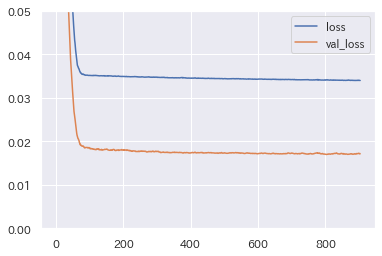

In [20]:
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.plot(history.epoch, history.history["val_loss"],label="val_loss")
plt.ylim(0,0.05)
plt.legend()

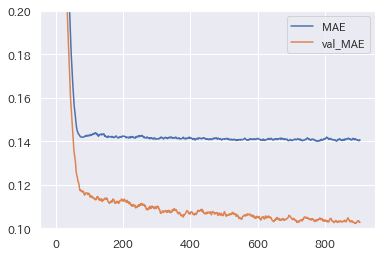

In [21]:
plt.plot(history.epoch, history.history["mean_absolute_error"], label="MAE")
plt.plot(history.epoch, history.history["val_mean_absolute_error"],label="val_MAE")
plt.ylim(0.10, 0.20)
plt.legend()

In [0]:
predY_test = model.predict(testX)
predY_train = model.predict(trainX)

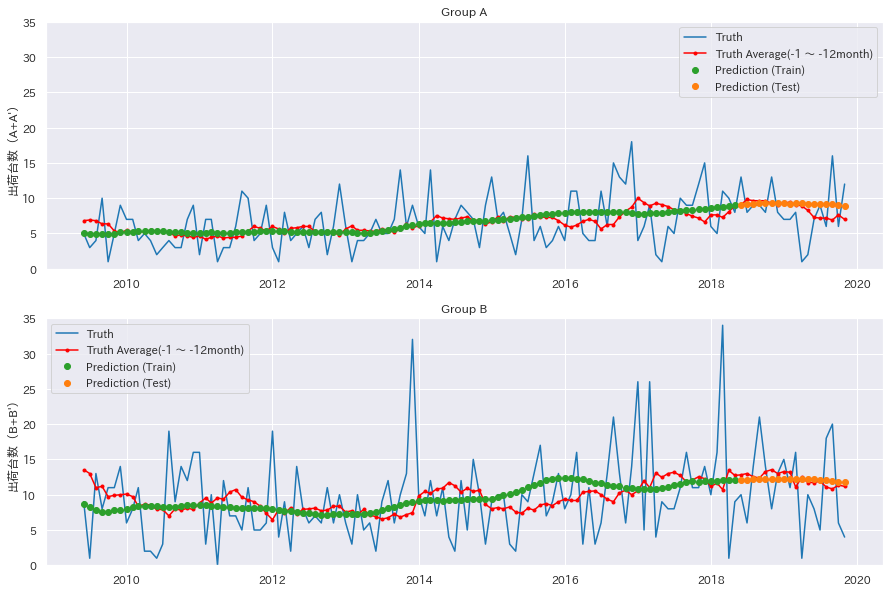

In [23]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(YearMonth4XY, Y[:,0]*groupAmax, c="#1f77b4", label="Truth")#truthデータ
plt.plot(YearMonth4XY, Y_1[:,]*groupAmax, marker=".", c="red", label="Truth Average(-1 ～ -12month)")
plt.plot(YearMonth_train, predY_train[:,0]*groupAmax, marker="o", c="#2ca02c", lw=0, label="Prediction (Train)")
plt.plot(YearMonth_test, predY_test[:,0]*groupAmax, marker="o", c="#ff7f0e", lw=0, label="Prediction (Test)")
plt.legend()
plt.ylabel("出荷台数（A+A'）")
plt.title("Group A")
plt.ylim(0,35)


plt.subplot(2,1,2)
plt.plot(YearMonth4XY, Y[:,1]*groupBmax, c="#1f77b4", label="Truth")
plt.plot(YearMonth4XY, Y_2[:,]*groupBmax, marker=".", c="red", label="Truth Average(-1 ～ -12month)")
plt.plot(YearMonth_train, predY_train[:,1]*groupBmax, marker="o", c="#2ca02c", lw=0, label="Prediction (Train)")
plt.plot(YearMonth_test, predY_test[:,1]*groupBmax, marker="o", c="#ff7f0e", lw=0, label="Prediction (Test)")
plt.legend()
plt.ylabel("出荷台数（B+B'）")
plt.title("Group B")
plt.ylim(0,35)

plt.savefig("/content/drive/My Drive/Samson/result.pdf")

In [0]:
ave = 6
YaveA = []

for i in range(maxlen-ave):
    YaveA.append(np.mean(Y[i:i+ave,0]))

YaveA = np.array(YaveA)

In [25]:
sum(predY_train[:,1])

29.90812461078167

In [26]:
sum(trainY[:,1])

30.176470588235297

In [27]:
print(trainY.shape)#目的変数の形確認
print(predY_train.shape)#目的変数の形確認

(108, 2)
(108, 2)


In [28]:
MAE_trainA = []#リスト作成
MAE_trainB = []#リスト作成
for i in range(108):
    #108回繰り返す処理
    if trainY[i, 0] > predY_train[i, 0]:
        #こちらの方が大きい場合
        MAE_trainA.append(trainY[i, 0] - predY_train[i, 0])
    else:
        #そうではない場合
        MAE_trainA.append(predY_train[i, 0] - trainY[i, 0])
    
    if trainY[i, 1] > predY_train[i, 1]:
        #こちらの方が大きい場合
        MAE_trainB.append(trainY[i, 1] - predY_train[i, 1])
    else:
        #そうではない場合
        MAE_trainB.append(predY_train[i, 1] - trainY[i, 1])

MAE_trainA = np.array(MAE_trainA)
MAE_trainB = np.array(MAE_trainB)
print(MAE_trainA.shape)
print(MAE_trainB.shape)
print('学習時(A)のMAE={:.3f}台'.format(MAE_trainA.mean()*groupAmax))
print('学習時(B)のMAE={:.3f}台'.format(MAE_trainB.mean()*groupBmax))

(108,)
(108,)
学習時(A)のMAE=2.688台
学習時(B)のMAE=4.224台


In [29]:
MAE_testA = []#リスト作成
MAE_testB = []#リスト作成
for i in range(18):
    #18回繰り返す処理
    if testY[i, 0] > predY_test[i, 0]:
        #こちらの方が大きい場合
        MAE_testA.append(testY[i, 0] - predY_test[i, 0])
    else:
        #そうではない場合
        MAE_testA.append(predY_test[i, 0] - testY[i, 0])
    
    if testY[i, 1] > predY_test[i, 1]:
        #こちらの方が大きい場合
        MAE_testB.append(testY[i, 1] - predY_test[i, 1])
    else:
        #そうではない場合
        MAE_testB.append(predY_test[i, 1] - testY[i, 1])

MAE_testA = np.array(MAE_testA)
MAE_testB = np.array(MAE_testB)
print(MAE_testA.shape)
print(MAE_testB.shape)
print('テスト時(A)のMAE={:.3f}台'.format(MAE_testA.mean()*groupAmax))
print('テスト時(B)のMAE={:.3f}台'.format(MAE_testB.mean()*groupBmax))

(18,)
(18,)
テスト時(A)のMAE=2.870台
テスト時(B)のMAE=4.766台


In [30]:
MAE_aveA = []#リスト作成
MAE_aveB = []#リスト作成
for i in range(126):
    #18回繰り返す処理
    if Y[i, 0] > Y_1[i]:
        #こちらの方が大きい場合
        MAE_aveA.append(Y[i, 0] - Y_1[i])
    else:
        #そうではない場合
        MAE_aveA.append(Y_1[i] - Y[i, 0])
    
    if Y[i, 1] > Y_2[i]:
        #こちらの方が大きい場合
        MAE_aveB.append(Y[i, 1] - Y_2[i])
    else:
        #そうではない場合
        MAE_aveB.append(Y_2[i] - Y[i, 1])

MAE_aveA = np.array(MAE_aveA)
MAE_aveB = np.array(MAE_aveB)
print(MAE_aveA.shape)
print(MAE_aveB.shape)
print('平均(A)のMAE={:.3f}台'.format(MAE_aveA.mean()*groupAmax))
print('平均(B)のMAE={:.3f}台'.format(MAE_aveB.mean()*groupBmax))

(126,)
(126,)
平均(A)のMAE=2.919台
平均(B)のMAE=4.665台


In [32]:
MAE_test_aveA  = []#リスト作成
MAE_test_aveB  = []#リスト作成
MAE_train_aveA = []#リスト作成
MAE_train_aveB = []#リスト作成

for i in range(18):
    #18回繰り返す処理
    if Y_1[i] > predY_test[i, 0]:
        #こちらの方が大きい場合
        MAE_test_aveA.append(Y_1[i] - predY_test[i, 0])
    else:
        #そうではない場合
        MAE_test_aveA.append(predY_test[i, 0] - Y_1[i])
    
    if Y_2[i] > predY_test[i, 1]:
        #こちらの方が大きい場合
        MAE_test_aveB.append(Y_2[i] - predY_test[i, 1])
    else:
        #そうではない場合
        MAE_test_aveB.append(predY_test[i, 1] - Y_2[i])

for i in range(108):
    #108回繰り返す処理
    if Y_1[i+18] > predY_train[i, 0]:
        #こちらの方が大きい場合
        MAE_train_aveA.append(Y_1[i+18] - predY_train[i, 0])
    else:
        #そうではない場合
        MAE_train_aveA.append(predY_train[i, 0] - Y_1[i+18])
    
    if Y_2[i+18] > predY_train[i, 1]:
        #こちらの方が大きい場合
        MAE_train_aveB.append(Y_2[i+18] - predY_train[i, 1])
    else:
        #そうではない場合
        MAE_train_aveB.append(predY_train[i, 1] - Y_2[i+18])

MAE_test_aveA = np.array(MAE_test_aveA)
MAE_test_aveB = np.array(MAE_test_aveB)
MAE_train_aveA = np.array(MAE_train_aveA)
MAE_train_aveB = np.array(MAE_train_aveB)
print(MAE_test_aveA.shape)
print(MAE_test_aveB.shape)
print(MAE_train_aveA.shape)
print(MAE_train_aveB.shape)
print('テスト時と移動平均値(A)のMAE={:.3f}台'.format(MAE_test_aveA.mean()*groupAmax))
print('テスト時と移動平均値(B)のMAE={:.3f}台'.format(MAE_test_aveB.mean()*groupBmax))
print('学習時と移動平均値(A)のMAE={:.3f}台'.format(MAE_train_aveA.mean()*groupAmax))
print('学習時と移動平均値(B)のMAE={:.3f}台'.format(MAE_train_aveB.mean()*groupBmax))
print('学習モデル算出値と移動平均値(A)のMAE={:.3f}台'.format((MAE_test_aveA.mean() + MAE_train_aveA.mean()) / 2 * groupAmax))
print('学習モデル算出値と移動平均値(B)のMAE={:.3f}台'.format((MAE_test_aveB.mean() + MAE_train_aveB.mean()) / 2 * groupBmax))

(18,)
(18,)
(108,)
(108,)
テスト時と移動平均値(A)のMAE=0.855台
テスト時と移動平均値(B)のMAE=0.717台
学習時と移動平均値(A)のMAE=0.657台
学習時と移動平均値(B)のMAE=1.392台
学習モデル算出値と移動平均値(A)のMAE=0.756台
学習モデル算出値と移動平均値(B)のMAE=1.055台


MAE:Mean Absolute Error　･･･　平均絶対値誤差